In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dft1=pd.read_csv('Tesla-max.csv',index_col='Date')
dft1= dft1.reindex(index=dft1.index[::-1])
dft1

,Close/Last,Volume,Open,High,Low
Date,,,,,
10/29/2014,$15.8733,74415158,$16.0753,$16.10,$15.7093
10/30/2014,$15.9107,48388191,$15.876,$16.0333,$15.6707
10/31/2014,$16.1133,56477372,$16.1673,$16.208,$15.9167
11/03/2014,$16.1727,63048088,$16.20,$16.504,$16.088
11/04/2014,$15.9287,55104452,$16.0327,$16.1567,$15.7687
...,...,...,...,...,...
10/22/2024,$217.97,43268740,$217.31,$218.22,$215.26
10/23/2024,$213.65,80938890,$217.125,$218.72,$212.11
10/24/2024,$260.48,204491900,$244.68,$262.1199,$242.65


In [4]:
#dft1['Open orig']=dft1['Open'].copy()
dft1['Open']=dft1['Open'].str.replace('$','').astype(float)
dft1['High']=dft1['High'].str.replace('$','').astype(float)
dft1['Low']=dft1['Low'].str.replace('$','').astype(float)
dft1['Close/Last']=dft1['Close/Last'].str.replace('$','').astype(float)
dft1

,Close/Last,Volume,Open,High,Low
Date,,,,,
10/29/2014,15.8733,74415158,16.0753,16.1000,15.7093
10/30/2014,15.9107,48388191,15.8760,16.0333,15.6707
10/31/2014,16.1133,56477372,16.1673,16.2080,15.9167
11/03/2014,16.1727,63048088,16.2000,16.5040,16.0880
11/04/2014,15.9287,55104452,16.0327,16.1567,15.7687
...,...,...,...,...,...
10/22/2024,217.9700,43268740,217.3100,218.2200,215.2600
10/23/2024,213.6500,80938890,217.1250,218.7200,212.1100
10/24/2024,260.4800,204491900,244.6800,262.1199,242.6500


In [5]:
dft1.describe()

,Close/Last,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,109.643820,1.120180e+08,109.664751,112.106685,107.115518
std,109.839424,7.412851e+07,109.922656,112.419215,107.262494
min,9.578000,1.065415e+07,9.488000,10.331300,9.403300
25%,16.830325,6.657620e+07,16.803825,17.049825,16.600000
50%,24.170650,9.273524e+07,24.252350,24.622000,23.664650
75%,215.577500,1.292471e+08,215.718750,220.540825,210.185000
max,409.970000,9.140809e+08,411.470000,414.496600,405.666600


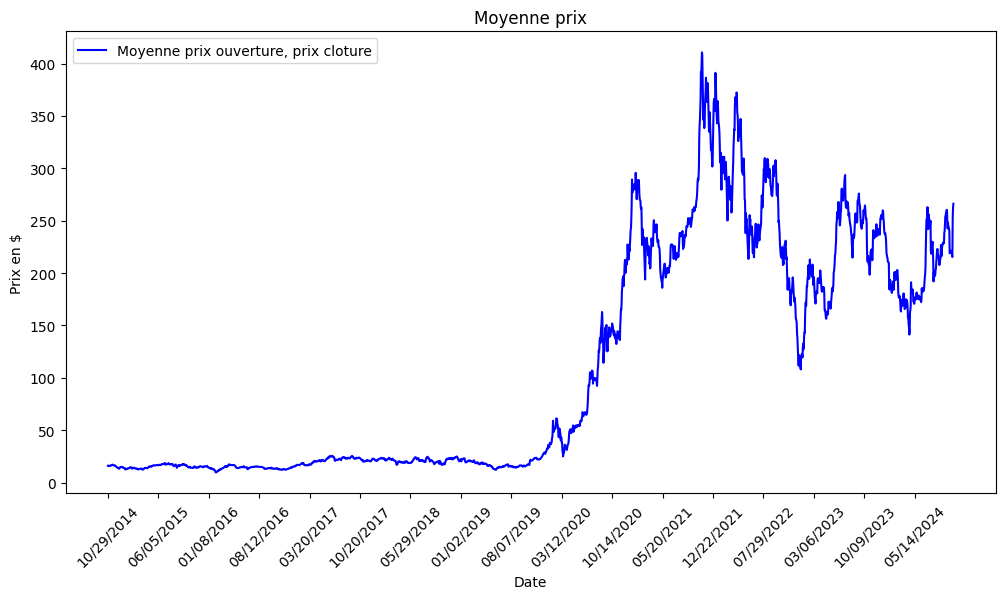

In [10]:
plt.figure(figsize=(12, 6))
plt.plot((dft1['Open']+dft1['Close/Last'])/2, label="Moyenne prix ouverture, prix cloture", color='blue')


abs = range(0, len(dft1), 150)
plt.xticks(abs, dft1.index[abs], rotation=45)

plt.xlabel('Date')
plt.ylabel('Prix en $')
plt.title('Moyenne prix')
plt.legend()
plt.show()

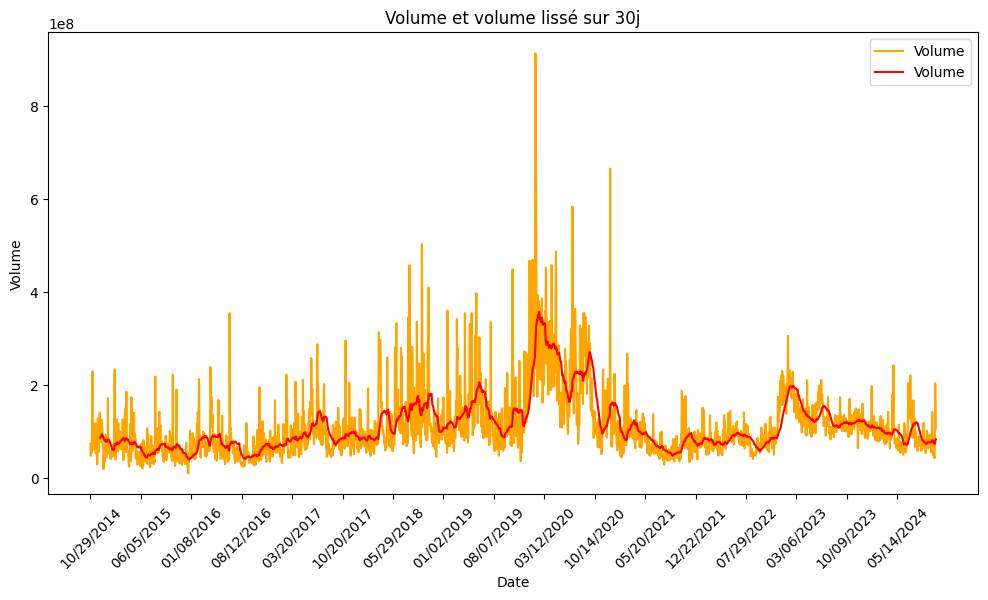

In [13]:
dft1['Volume lissé'] = dft1['Volume'].rolling(window=30).mean()


plt.figure(figsize=(12, 6))
plt.plot(dft1['Volume'], label="Volume", color='orange')
plt.plot(dft1['Volume lissé'], label="Volume", color='red')


abs = range(0, len(dft1), 150)
plt.xticks(abs, dft1.index[abs], rotation=45)

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume et volume lissé sur 30j')
plt.legend()
plt.show()

In [14]:
dft1.columns

Index(['Close/Last', 'Volume', 'Open', 'High', 'Low', 'Volume lissé'], dtype='object')

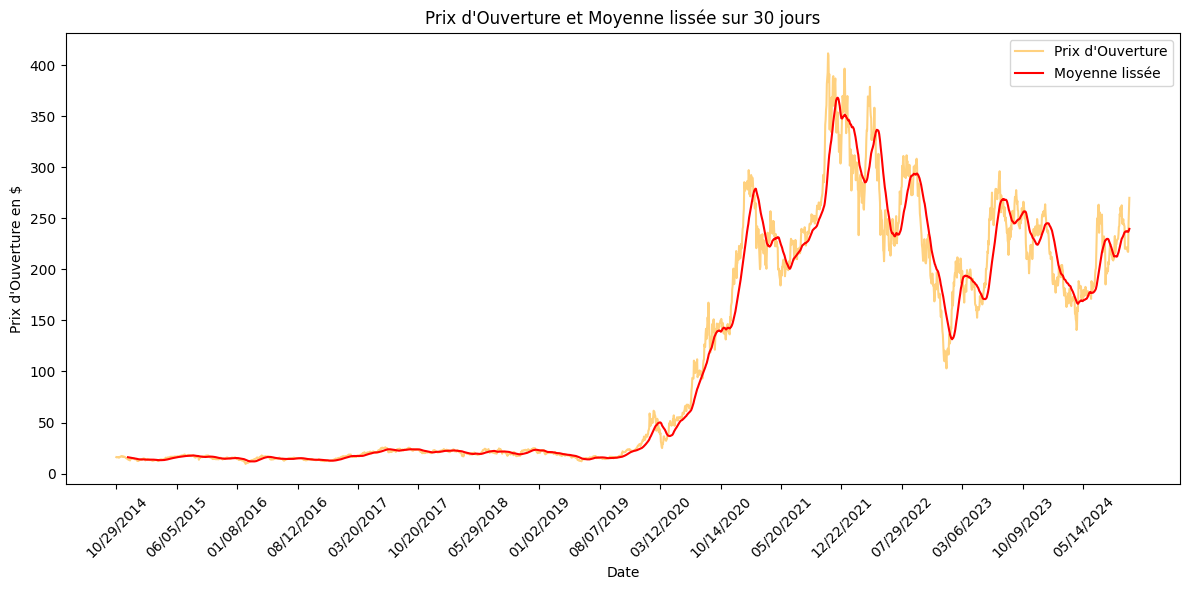

In [17]:
dft1['Moyenne lissée'] = dft1['Open'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(dft1['Open'], label="Prix d'Ouverture", color='orange', alpha=0.5)
plt.plot(dft1['Moyenne lissée'], label='Moyenne lissée', color='red')

abs = range(0, len(dft1), 150)
plt.xticks(abs, dft1.index[abs], rotation=45)

plt.xlabel('Date')
plt.ylabel('Prix d\'Ouverture en $')
plt.title('Prix d\'Ouverture et Moyenne lissée sur 30 jours')
plt.legend()
plt.tight_layout()
plt.show()